# Hola Gastón! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con la primera parte Gastón, el análisis realizado es en detalle y permitirá entrenar correctamente los modelos. Sin embargo, falta seleccionar o modificar la data de tal forma que al generar las columnas adicionales con OHE no tengamos data con demasiadas dimensiones. Una vez hecha esta corrección revisaré los modelos.
    
Saludos!    

</div>

-----

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
pip install mlxtend --upgrade --no-deps


Note: you may need to restart the kernel to use updated packages.


In [2]:
# importar librerías

%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import math
import random

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#from sklearn.feature_selection import SequentialFeatureSelector as sfs

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, SCORERS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [3]:
# cargar datos y mostrarlos

df = pd.read_csv('/datasets/car_data.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [4]:
# revisar info general

df.info()
print('-'*50)
display(df.describe())
print('-'*50)
display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


--------------------------------------------------


,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,15470,8,2,250,7,40,2,109,18592
top,05/03/2016 14:25,sedan,manual,golf,petrol,volkswagen,no,03/04/2016 00:00,07/04/2016 07:16
freq,66,91457,268251,29232,216352,77013,247161,13719,654


Tenemos 5 características con varios valores nulos que debemos tratar antes de crear y entrenar un modelo de ML.

Al ver la información general del dataset y sus primeras filas, nos damos cuenta de varias cosas que podemos corregir para que el desarrollo y entrenamiento de un modelo de ML sea más preciso en sus predicciones.

1. Podemos eliminar las columnas o características que no aportan valor al modelo: `DateCrawled`, `DateCreated`, `NumberOfPictures`, `PostalCode`, `LastSeen`.
2. Limpiar los datos de la columna `RegistrationYear`.
3. Debemos identificar los valores ausentes y reemplazarlos o eliminarlos según corresponda.
4. Debemos buscar y eliminar los datos duplicados.
5. Analizar variables numéricas, en especial la variable objetivo `Price`, en la que debemos gestionar los autos con precio = 0, eliminar o reemplazar.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcto con estos comentarios, efectivamente tenemos variables que no tienen valor predictivo y por otro lado variables que se deben corregir

</div>

Primero, vamor a dejar una copia del dataset original, en caso de necesitarlo más adelante, por ejemplo, para comparar resultados.

In [5]:
# copiar y guardar el df original en una nueva variable

df_original = df.copy()

**1) Eliminar columnas**

In [6]:
# eliminar columnas y comprobar

df = df.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen', 'RegistrationMonth'],1)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcto

</div>

**2) Limpiar columna `RegistrationYear`**

Viendo la tabla con las descripciones de las características numéricas, notamos que la variable `RegistrationYear` tiene algunos años muy antiguos o de años futuros, lo cual asumimos que son datos mal ingresados o erróneos, vamos a analizarlos un poco más.

In [7]:
# revisemos los años de registro

df['RegistrationYear'].sort_values().unique()

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

In [8]:
# veamos cuántos registros están fuera del intervalo [1910,2019]

df[(df['RegistrationYear'] < 1910) | (df['RegistrationYear'] > 2019)]['RegistrationYear'].value_counts().sum()

171

Consideraremos registros válidos entre los años 1910 y 2019, el resto los eliminaremos, ya que no son relevantes y son pocos casos, 171 de +350.000.

In [9]:
# filtrar dataframe por los años de registro válidos y comprobar

df = df[(df['RegistrationYear'] >= 1910) & (df['RegistrationYear'] <= 2019)].reset_index(drop=True)
df['RegistrationYear'].sort_values().unique()

array([1910, 1915, 1919, 1920, 1923, 1925, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [10]:
# mostrar resumen de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354198 entries, 0 to 354197
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354198 non-null  int64 
 1   VehicleType       316879 non-null  object
 2   RegistrationYear  354198 non-null  int64 
 3   Gearbox           334503 non-null  object
 4   Power             354198 non-null  int64 
 5   Model             334568 non-null  object
 6   Mileage           354198 non-null  int64 
 7   FuelType          321431 non-null  object
 8   Brand             354198 non-null  object
 9   NotRepaired       283191 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien!

</div>

**3) Gestionar Columnas con Valores Nulos**

Veamos cómo se distribuyen los valores de las características con valores nulos.

In [11]:
# identificar columnas con valores vacíos y la distribución de sus valores no nulos

for col in df.columns:
    
    if df[col].isna().sum() > 0:
        print(col,':', df[col].isna().sum(),',',f'{df[col].isna().sum()/df[col].shape[0]: .2%}')
        print(df[col].value_counts())
        print('_'*25)

VehicleType : 37319 ,  10.54%
sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64
_________________________
Gearbox : 19695 ,  5.56%
manual    268225
auto       66278
Name: Gearbox, dtype: int64
_________________________
Model : 19630 ,  5.54%
golf                  29218
other                 24403
3er                   19756
polo                  13063
corsa                 12564
                      ...  
serie_2                   8
rangerover                4
serie_3                   4
serie_1                   2
range_rover_evoque        2
Name: Model, Length: 250, dtype: int64
_________________________
FuelType : 32767 ,  9.25%
petrol      216318
gasoline     98713
lpg           5310
cng            564
hybrid         233
other          203
electric        90
Name: FuelType, dtype: int64
_________________________
NotRepaired : 71007 ,

Comenzaremos por las columnas que tienen solo 2 valores categóricos, `NotRepaired` y `Gearbox`, en las cuales reemplazaremos los valores nulos por el valor que más se repite, equivalente a reemplazar por la moda.

In [12]:
# comencemos reemplazando los valores vacíos por 'no' y 'manual', respectivamente,
# asumiendo que si no hay datos, entonces no fueron reparados o son autos manuales

columns_mode = ['NotRepaired','Gearbox']

def replace_mode(df,columns):
    for col in columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(df[col].value_counts())
        print('_'*25)
        print('Registros Totales:',f'{df[col].count():,}')
        print()



<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, de acuerdo

</div>

In [13]:
# comprobar

replace_mode(df,columns_mode)

no     318153
yes     36045
Name: NotRepaired, dtype: int64
_________________________
Registros Totales: 354,198

manual    287920
auto       66278
Name: Gearbox, dtype: int64
_________________________
Registros Totales: 354,198



In [14]:
df.shape

(354198, 10)

Para las columnas `VehicleType` y `FuelType`, notamos que los valores se concentran en 2 o 3 opciones, por lo que reemplazaremos los valores nulos por un valor aleatorio entre los que más se repiten.

In [15]:
# crear listas con los valores que más se repiten en cada columna, top 3 y top 2, respectivamente
# ordenados de mayor a menor según su frecuencia

vtype_top = df['VehicleType'].value_counts().head(3).index
fuel_top = df['FuelType'].value_counts().head(2).index

In [16]:
# mostrar listas

print(vtype_top)
print(fuel_top)

Index(['sedan', 'small', 'wagon'], dtype='object')
Index(['petrol', 'gasoline'], dtype='object')


In [17]:
# crear listas con los indices con valores nulos de cada columna

vtype_index = df[df['VehicleType'].isna()].index
fuel_index = df[df['FuelType'].isna()].index

In [18]:
# crear función para reemplazar aleatoriamente por uno de los valores de la lista

def replace_random(column,col_top,null_indexs):
    column.loc[null_indexs] = np.random.choice(col_top,len(null_indexs))
    
    print(column.value_counts())
    print('Registros Totales:',column.count())
    print('_'*25)

In [19]:
# comprobar

replace_random(df['VehicleType'],vtype_top,vtype_index)
replace_random(df['FuelType'],fuel_top,fuel_index)

sedan          103845
small           92336
wagon           77592
bus             28775
convertible     20203
coupe           16163
suv             11996
other            3288
Name: VehicleType, dtype: int64
Registros Totales: 354198
_________________________
petrol      232664
gasoline    115134
lpg           5310
cng            564
hybrid         233
other          203
electric        90
Name: FuelType, dtype: int64
Registros Totales: 354198
_________________________


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Por último, para la columna `Model`, eliminaremos los valores nulos que tiene, ya que representan poco más del 5% de los registros y no debería afectar en mayor medida al modelo.

In [20]:
df = df[~df['Model'].isna()].reset_index(drop=True)
df

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,480,wagon,1993,manual,0,golf,150000,petrol,volkswagen,no
1,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,no
2,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
3,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
4,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
334563,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
334564,0,small,2005,manual,0,colt,150000,petrol,mitsubishi,yes
334565,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
334566,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo en esta parte

</div>

**4) Eliminar Duplicados**

In [21]:
df.duplicated().sum()

51665

In [22]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282903 entries, 0 to 282902
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             282903 non-null  int64 
 1   VehicleType       282903 non-null  object
 2   RegistrationYear  282903 non-null  int64 
 3   Gearbox           282903 non-null  object
 4   Power             282903 non-null  int64 
 5   Model             282903 non-null  object
 6   Mileage           282903 non-null  int64 
 7   FuelType          282903 non-null  object
 8   Brand             282903 non-null  object
 9   NotRepaired       282903 non-null  object
dtypes: int64(4), object(6)
memory usage: 21.6+ MB


**Notar que al reemplazar tantos valores nulos, era muy probable que aumentaran los registros duplicados, los cuales deben ser eliminados.**

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, bien

</div>

**5) Analizar Variables Numéricas**

In [23]:
# cantidad de variables numéricas

(df.dtypes == 'int64').sum()

4

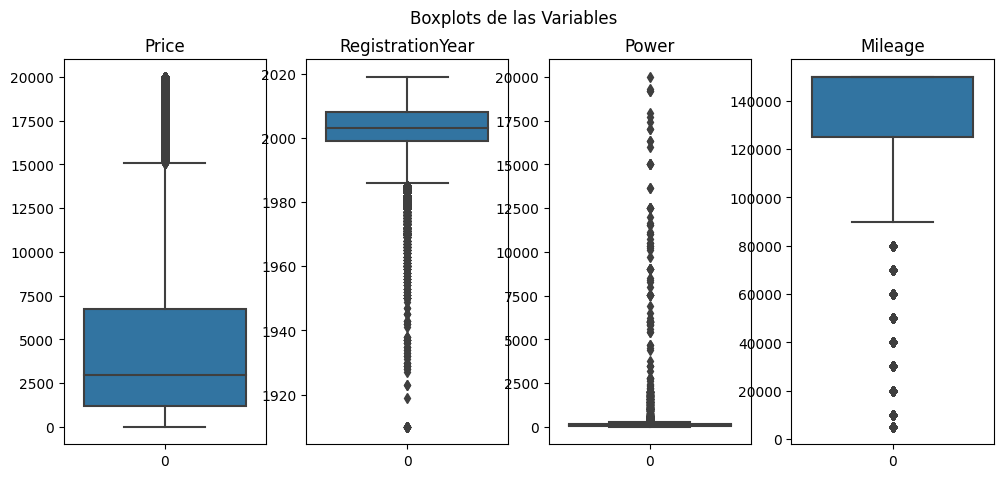

In [24]:
# mostrar boxplot de las variables para buscar valores atípicos

fig, axs = plt.subplots(1,4, figsize=(12,5))
fig.suptitle('Boxplots de las Variables')

ax_idx = 0

for col in df.columns:    
    if df[col].dtypes == 'int64':

        sns.boxplot(data=df[col], ax = axs[ax_idx])
        axs[ax_idx].set_title(col)
        ax_idx += 1


In [25]:
# ver cuántos autos tienen precio = 0

df[df['Price'] == 0]['Price'].count()

7014

Como son pocos casos con respecto al dataset, los vamos a eliminar.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, de acuerdo

</div>

In [26]:
# filtrar por autos con precio > 0

df = df[df['Price'] > 0].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275889 entries, 0 to 275888
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             275889 non-null  int64 
 1   VehicleType       275889 non-null  object
 2   RegistrationYear  275889 non-null  int64 
 3   Gearbox           275889 non-null  object
 4   Power             275889 non-null  int64 
 5   Model             275889 non-null  object
 6   Mileage           275889 non-null  int64 
 7   FuelType          275889 non-null  object
 8   Brand             275889 non-null  object
 9   NotRepaired       275889 non-null  object
dtypes: int64(4), object(6)
memory usage: 21.0+ MB


Analicemos la columna `Power`.

In [27]:
# mostremos la distribución de sus datos

df['Power'].value_counts(normalize=True)

0        0.099971
75       0.061666
150      0.041325
60       0.040567
140      0.036957
           ...   
4507     0.000004
409      0.000004
1432     0.000004
4400     0.000004
17019    0.000004
Name: Power, Length: 669, dtype: float64

Como el 10% de los datos tienen Power = 0, los reemplazaremos por el promedio, asumiendo que sería extraño que se vendan tantos autos con Potencia = 0.

In [28]:
# reemplacemos por la media

df['Power'] = df['Power'].replace(0,int(df['Power'].mean()))
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,480,wagon,1993,manual,113,golf,150000,petrol,volkswagen,no
1,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,no
2,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
3,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
4,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


La última columna `Mileage` la dejaremos tal como está, ya que no tiene valores 0.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en esta primera parte, importante revisar la data para poder generar modelos adecuados

</div>

## Entrenamiento del modelo 

Antes de dividir el dataset en los conjuntos de entrenamiento y de prueba, debemos preparar los datos para poder entrenar los modelos, cambiando las variables categóricas en variables numéricas.

Analizar variables categóricas

In [29]:
# descripción de las variables categóricas

df.describe(include='object')

,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired
count,275889,275889,275889,275889,275889,275889
unique,8,2,250,7,39,2
top,sedan,manual,other,petrol,volkswagen,no
freq,80134,221552,22048,180134,56570,246368


La variable `Model` es la que tiene la mayor cantidad de datos únicos, por lo que analizaremos su distribución.

<AxesSubplot:>

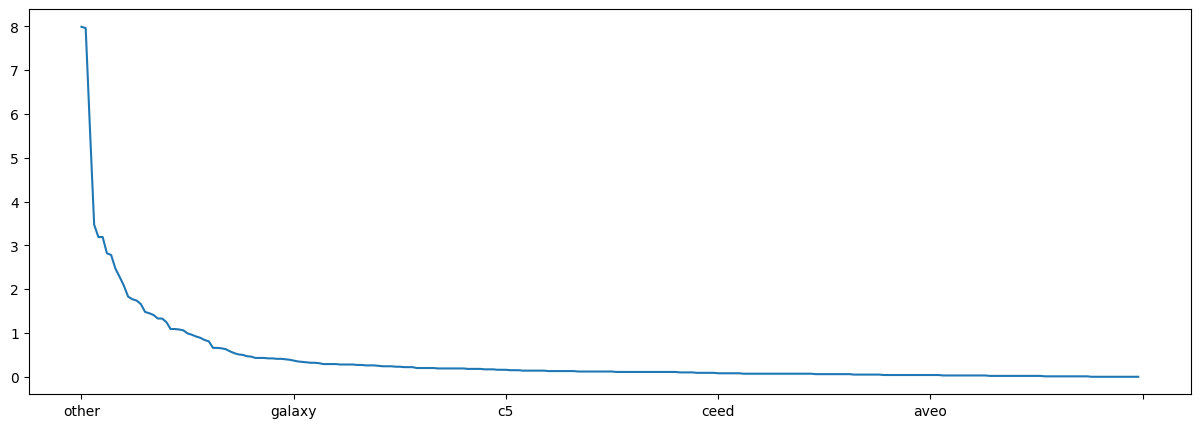

In [30]:
# graficar distribución de la columna 'Model'

model_dist_q = df['Model'].value_counts()
model_dist_perc = df['Model'].value_counts(normalize=True).round(4)*100

model_dist_perc.plot(x=model_dist_perc.index,figsize=(15,5))

In [31]:
model_dist_perc.index

Index(['other', 'golf', '3er', 'polo', 'corsa', 'astra', 'a4', 'passat',
       'c_klasse', '5er',
       ...
       'samara', 'gl', 'elefantino', 'i3', 'serie_2', 'kalina', 'rangerover',
       'serie_3', 'serie_1', 'range_rover_evoque'],
      dtype='object', length=250)

In [32]:
# identificar el 50% de las categorías

init = 0
acum = []

for l in model_dist_perc:
    init +=l
    if init > 50:
        break
    
    acum.append(round(init,2))   

In [33]:
# mostrar porcentajes acumulados y cuántos modelos representan el 50% del total de registros

print(acum)
print('Cantidad de Modelos de Auto:',len(acum))


[7.99, 15.95, 21.62, 25.09, 28.28, 31.47, 34.29, 37.07, 39.54, 41.82, 43.9, 45.73, 47.5, 49.24]
Cantidad de Modelos de Auto: 14


Vemos que solo 14 modelos de auto representan el 50% de los registros, lo que hace que la columna `Model` tenga mucha dispersión o variabilidad, por lo que no es significativa para entrenar un modelo de ML para predecir el precio de un auto.

Por lo tanto, procedemos a eliminar esta característica, para ajustar más el conjunto de entrenamiento y agilizar su entrenamiento.

In [34]:
# eliminar columna 'Model'

df = df.drop('Model',axis=1)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Mileage,FuelType,Brand,NotRepaired
0,480,wagon,1993,manual,113,150000,petrol,volkswagen,no
1,9800,suv,2004,auto,163,125000,gasoline,jeep,no
2,1500,small,2001,manual,75,150000,petrol,volkswagen,no
3,3600,small,2008,manual,69,90000,gasoline,skoda,no
4,650,sedan,1995,manual,102,150000,petrol,bmw,yes


In [35]:
df.shape

(275889, 9)

Por lo tanto, quedamos con 9 columnas, de las cuales 5 son categóricas, 3 numéricas y la columna objetivo.
Ahora podemos aplicar OHE para convertir las variables categóricas en numéricas y entrenar los modelos.

In [36]:
# usar get dummies para convertir las variables categóricas en 0s y 1s.

df_dummy = pd.get_dummies(df, drop_first = True)
df_dummy.shape

(275889, 57)

In [37]:
df_dummy.head()

,Price,RegistrationYear,Power,Mileage,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_seat,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
0,480,1993,113,150000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9800,2004,163,125000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1500,2001,75,150000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3600,2008,69,90000,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,650,1995,102,150000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Luego de aplicar el método dummy, obtenemos un dataset con +300 filas, por lo que debemos identificar cuáles son realmente importantes para el modelo, eliminando las que no aporten valor para que sea más eficiente.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Efectivamente, tener demasiadas columnas solo perjudicará a los modelos

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Me parece que aquí falta la acción mencionada, de eliminar las columnas. Te recomiendo considerar no usar las features originales que generan más columnas con el OHE.
    
Antes de revisar los modelos es necesario corregir esto.    

</div>

Ahora, debemos dividir nuestro dataset en los conjuntos de entrenamiento y de prueba.

In [38]:
# dividir dataset en train (X) and test (y)

X = df_dummy.drop('Price',1)
y = df_dummy['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Aplicaremos el método de Forward Feature Selection para seleccionar las variables más relevantes para entrenar un modelo de regresión lineal, evaluaremos su calidad con RMSE y lo compararemos con el RMSE de un modelo entrenado con el conjunto dummy.

In [39]:
# sorted(SCORERS.keys())

In [41]:
# crear modelo de regresión lineal y aplicarle el Forward Selection Features

%time

model = LinearRegression()

selector = sfs(
    model,
    k_features=20,
    forward=True,
    floating=False,
    verbose=1,
    scoring='neg_mean_squared_error',
    cv=5
)

selector

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


SequentialFeatureSelector(estimator=LinearRegression(), k_features=20,
                          scoring='neg_mean_squared_error', verbose=1)

In [42]:
# entrenar 

%time

selector = selector.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
Features: 1/20[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   22.8s
Features: 2/20[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   26.2s
Features: 3/20[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   29.3s
Features: 4/20[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   34.7s
Features: 5/20[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   40.2s
Features: 6/20[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   41.5s
Features: 7/20[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   48.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   48.7s
Features: 20/20

In [44]:
# mostrar resultado final del RMSE

best_score = -selector.k_score_
rmse_sfs = best_score**0.5

print('neg_mean_square_error:', round(best_score,4))
print('RMSE:',round(rmse_sfs,4))

neg_mean_square_error: 10601711.4218
RMSE: 3256.0269


In [45]:
# mostrar columnas seleccionadas como las 10 más miportantes

selected_features = list(selector.k_feature_names_)
selected_features

['RegistrationYear',
 'Power',
 'Mileage',
 'VehicleType_convertible',
 'VehicleType_coupe',
 'VehicleType_sedan',
 'VehicleType_small',
 'VehicleType_suv',
 'VehicleType_wagon',
 'Gearbox_manual',
 'FuelType_gasoline',
 'Brand_audi',
 'Brand_bmw',
 'Brand_mercedes_benz',
 'Brand_mini',
 'Brand_porsche',
 'Brand_skoda',
 'Brand_smart',
 'Brand_volkswagen',
 'NotRepaired_yes']

In [48]:
# definir nuevos conjuntos de entrenamiento y test

X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Luego, evaluaremos distintos modelos con la métrica RSME para determinar cuál nos ofrece la mayor precisión según dicha métrica.

<u>**Modelo de Regresión Lineal**</u>

In [53]:
# entrenar y evaluar modelo de regresión lineal

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

# predecir precio con el modelo entrenado

predictions = model_lr.predict(X_test)

# evaluar RMSE

rmse_lr = mean_squared_error(y_test, predictions)**0.5
print('RMSE Linear Regression Model:')
print(rmse_lr)
print('-'*25)

%time

RMSE Linear Regression Model:
3281.6790215313913
-------------------------
CPU times: user 6 µs, sys: 7 µs, total: 13 µs
Wall time: 6.44 µs


RMSE Linear Regression Model:
3281.6790215313913


<u>**Random Forest Regressor**</u>

In [54]:
# Random Forest Regressor


model_rfr = RandomForestRegressor(n_estimators=50,max_depth=10,random_state=42)
model_rfr.fit(X_train,y_train)
predictions = model_rfr.predict(X_test)

rmse_rfr = mean_squared_error(y_test,predictions)**0.5

print('RMSE Random Forest Regressor:')
print(rmse_rfr)
print('-'*25)

%time

RMSE Random Forest Regressor:
2037.365616699744
-------------------------
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


<u>**Modelo CatBoost**</u>

In [55]:
# crear función para seleccionar las variables categóricas y guardarlas en una lista

cat_features = []

def select_cat_features(df):
    for col in df.columns:
        if df[col].dtypes == 'object':
            cat_features.append(col)
    print(cat_features)
            

In [56]:
# comprobar

select_cat_features(df)

['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'NotRepaired']


In [60]:
# crear objeto del modelo CatBoost Regressor, entrenarlo y evaluarlo

model_catboost = CatBoostRegressor(
    loss_function='RMSE',
    iterations=200,
    eval_metric='RMSE',
    leaf_estimation_method='Gradient',
    learning_rate=0.05
)

model_catboost.fit(X_train, y_train, eval_set=(X_test, y_test))
%time

0:	learn: 4456.4509743	test: 4458.8649038	best: 4458.8649038 (0)	total: 36.3ms	remaining: 7.22s
1:	learn: 4319.0807750	test: 4321.9018905	best: 4321.9018905 (1)	total: 71.2ms	remaining: 7.05s
2:	learn: 4191.7264975	test: 4194.8712483	best: 4194.8712483 (2)	total: 105ms	remaining: 6.92s
3:	learn: 4075.7700301	test: 4078.9779502	best: 4078.9779502 (3)	total: 141ms	remaining: 6.89s
4:	learn: 3968.6575330	test: 3972.3892236	best: 3972.3892236 (4)	total: 174ms	remaining: 6.79s
5:	learn: 3865.9304571	test: 3870.0691187	best: 3870.0691187 (5)	total: 210ms	remaining: 6.78s
6:	learn: 3763.1761021	test: 3767.6406261	best: 3767.6406261 (6)	total: 244ms	remaining: 6.74s
7:	learn: 3674.2566103	test: 3679.2141691	best: 3679.2141691 (7)	total: 282ms	remaining: 6.76s
8:	learn: 3585.9974126	test: 3591.4743810	best: 3591.4743810 (8)	total: 322ms	remaining: 6.83s
9:	learn: 3504.0798686	test: 3510.0654707	best: 3510.0654707 (9)	total: 358ms	remaining: 6.8s
10:	learn: 3427.8845892	test: 3434.2385750	best: 

87:	learn: 2104.4845030	test: 2120.0880566	best: 2120.0880566 (87)	total: 2.99s	remaining: 3.8s
88:	learn: 2101.5944730	test: 2117.1815707	best: 2117.1815707 (88)	total: 3.02s	remaining: 3.76s
89:	learn: 2097.6637890	test: 2113.1784127	best: 2113.1784127 (89)	total: 3.05s	remaining: 3.73s
90:	learn: 2095.0813564	test: 2110.8327268	best: 2110.8327268 (90)	total: 3.08s	remaining: 3.69s
91:	learn: 2092.0582138	test: 2107.8201321	best: 2107.8201321 (91)	total: 3.11s	remaining: 3.65s
92:	learn: 2088.5907177	test: 2104.2560507	best: 2104.2560507 (92)	total: 3.15s	remaining: 3.62s
93:	learn: 2085.9948501	test: 2101.5885458	best: 2101.5885458 (93)	total: 3.18s	remaining: 3.58s
94:	learn: 2083.8413753	test: 2099.4773728	best: 2099.4773728 (94)	total: 3.21s	remaining: 3.54s
95:	learn: 2081.5621121	test: 2097.1851385	best: 2097.1851385 (95)	total: 3.24s	remaining: 3.51s
96:	learn: 2078.8736583	test: 2094.4634783	best: 2094.4634783 (96)	total: 3.28s	remaining: 3.48s
97:	learn: 2075.7892454	test: 2

175:	learn: 1958.8164850	test: 1978.4729767	best: 1978.4729767 (175)	total: 5.85s	remaining: 797ms
176:	learn: 1957.9196638	test: 1977.6572063	best: 1977.6572063 (176)	total: 5.88s	remaining: 764ms
177:	learn: 1956.7880722	test: 1976.6455197	best: 1976.6455197 (177)	total: 5.91s	remaining: 731ms
178:	learn: 1955.9891601	test: 1975.8615502	best: 1975.8615502 (178)	total: 5.94s	remaining: 697ms
179:	learn: 1954.9341297	test: 1974.9633002	best: 1974.9633002 (179)	total: 5.97s	remaining: 664ms
180:	learn: 1953.8828953	test: 1974.0265344	best: 1974.0265344 (180)	total: 6.01s	remaining: 631ms
181:	learn: 1952.9105885	test: 1973.0280358	best: 1973.0280358 (181)	total: 6.04s	remaining: 598ms
182:	learn: 1952.0428946	test: 1972.1669661	best: 1972.1669661 (182)	total: 6.08s	remaining: 565ms
183:	learn: 1951.4727425	test: 1971.7961272	best: 1971.7961272 (183)	total: 6.11s	remaining: 531ms
184:	learn: 1951.0106392	test: 1971.3324516	best: 1971.3324516 (184)	total: 6.14s	remaining: 498ms
185:	learn

In [61]:
# probar modelo con el conjunto de prueba

catb_pred = model_catboost.predict(X_test)
rmse_catb = mean_squared_error(y_test, catb_pred)**0.5
rmse_catb

1959.775506331511

<u>**Modelo LightGMB**</u>

In [62]:
# crear objeto del modelo CatBoost Regressor, entrenarlo y evaluarlo

model_lgbm = LGBMRegressor(
    boosting_type='gbdt',
    random_state=42,
    num_leaves=25,
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    reg_alpha=0.0,
    reg_lambda=0.0
)

model_lgbm.fit(X_train, y_train, eval_set=(X_test,y_test))
%time

[1]	valid_0's l2: 1.8429e+07
[2]	valid_0's l2: 1.61625e+07
[3]	valid_0's l2: 1.43138e+07
[4]	valid_0's l2: 1.27997e+07
[5]	valid_0's l2: 1.15377e+07
[6]	valid_0's l2: 1.04958e+07
[7]	valid_0's l2: 9.61198e+06
[8]	valid_0's l2: 8.89759e+06
[9]	valid_0's l2: 8.24722e+06
[10]	valid_0's l2: 7.69779e+06
[11]	valid_0's l2: 7.27811e+06
[12]	valid_0's l2: 6.87723e+06
[13]	valid_0's l2: 6.54483e+06
[14]	valid_0's l2: 6.24724e+06
[15]	valid_0's l2: 6.00825e+06
[16]	valid_0's l2: 5.79203e+06
[17]	valid_0's l2: 5.61359e+06
[18]	valid_0's l2: 5.45556e+06
[19]	valid_0's l2: 5.30084e+06
[20]	valid_0's l2: 5.15616e+06
[21]	valid_0's l2: 5.03062e+06
[22]	valid_0's l2: 4.92631e+06
[23]	valid_0's l2: 4.81755e+06
[24]	valid_0's l2: 4.71459e+06
[25]	valid_0's l2: 4.63266e+06
[26]	valid_0's l2: 4.55025e+06
[27]	valid_0's l2: 4.47694e+06
[28]	valid_0's l2: 4.41642e+06
[29]	valid_0's l2: 4.35995e+06
[30]	valid_0's l2: 4.30136e+06
[31]	valid_0's l2: 4.25288e+06
[32]	valid_0's l2: 4.20241e+06
[33]	valid_0's l2:

In [63]:
# probar modelo con el conjunto de prueba

lgbm_pred = model_lgbm.predict(X_test)
rmse_lgbm = mean_squared_error(y_test, lgbm_pred)**0.5

rmse_lgbm

1867.6704462406374

## Análisis del modelo

In [64]:
# comparar resultados del RSME de cada modelo

print('Model','RSME')
print('Linear Regressor:',rmse_lr)
print('Random Forest Regressor:',rmse_rfr)
print('CatBoost:',rmse_catb)
print('LGBM Regressor:',rmse_lgbm)

Model RSME
Linear Regressor: 3281.6790215313913
Random Forest Regressor: 2037.365616699744
CatBoost: 1959.775506331511
LGBM Regressor: 1867.6704462406374


<u>**Conclusión**</u>

Comparando los resultados obtenidos del RMSE y el tiempo de ejecución de cada modelo, notamos que el modelo con el menor RMSE y con menor tiempo fue el modelo de LGBM Regressor.


Para llegar a esta conclusión, primero llevamos a cabo la etapa de pre procesamiento de los datos, en el cual limpiamos nuestro dataset, eliminamos columnas de baja o nula importancia para nuestro modelo, quitamos duplicados, entre otros pasos.

Luego, pasamos al entrenamiento del modelo, pero como tenía variables numéricas y categóricas, fue necesario convertir estas últimas en numéricas utilizando el método OHE (con dummy) antes de entrenar el modelo. Después, para mejorar aún más la precisión de los modelos, seleccionamos las mejores 20 características del dataset para entrenar los modelos de regresión lineal, bosque aletorio de regressión, catboost y lightgbm.

Para terminar, utilizamos la métrica RMSE para comparar la calidad de los modelos y el comando `%time` para medir la velocidad de ejecución de los modelos, resultando el de LGBM como el más rápido y con mejor RMSE.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en orden de ejecución
- [ ]  Los datos han sido descargados y preparados
- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos